In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [133]:
average_per_scaffold = 6 # we're just assming that there is some overlap in terms and we'll just... do this...
pool_size = 23

# each cell expresses a random set of numbers from the pool size.
def make_cell_barcode(average_per_scaffold, pool_size):
    cell_bc = np.random.choice(np.arange(pool_size), average_per_scaffold, replace = False)
    return cell_bc

# generate a dataframe with the cell barcodes for each cell.
num_cells = 100
df = pd.DataFrame({
    "cell_bc": [make_cell_barcode(average_per_scaffold, pool_size) for _ in range(num_cells)]
})
df['cell_bc_set'] = df['cell_bc'].apply(lambda x: set(x))


# make a column for each number in the pool size.
for i in range(pool_size):
    df[f"num_{i}"] = df['cell_bc_set'].apply(lambda x: 1 if i in x else 0)

num_cols = [col for col in df.columns if "num" in col]

# divide the group of columns into 4
groups = np.array_split(num_cols, 4)

# for each group, combine the values by row into a single value.
for group in groups:
    df[f"group_{group}"] = df[group].max(axis = 1)

# rename each group to group 1, 2, 3, 4
for i, col in enumerate(groups):
    # print(col)
    col = f"group_{col}"
    print(i, col)
    df = df.rename(columns = {col: f"group_{i+1}"})
    


0 group_['num_0' 'num_1' 'num_2' 'num_3' 'num_4' 'num_5']
1 group_['num_6' 'num_7' 'num_8' 'num_9' 'num_10' 'num_11']
2 group_['num_12' 'num_13' 'num_14' 'num_15' 'num_16' 'num_17']
3 group_['num_18' 'num_19' 'num_20' 'num_21' 'num_22']


<Axes: >

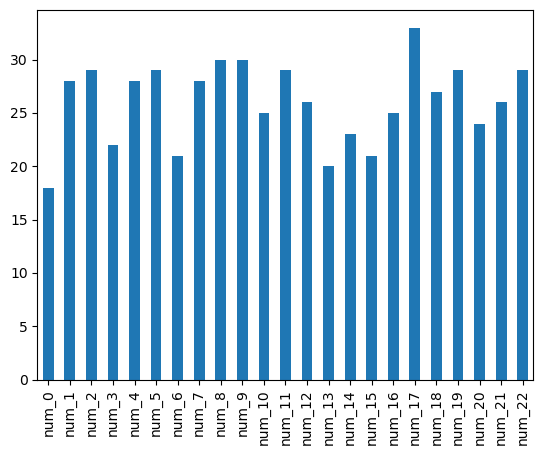

In [134]:
df[num_cols].sum().plot(kind = 'bar')

In [135]:
group_cols = [col for col in df.columns if "group" in col]

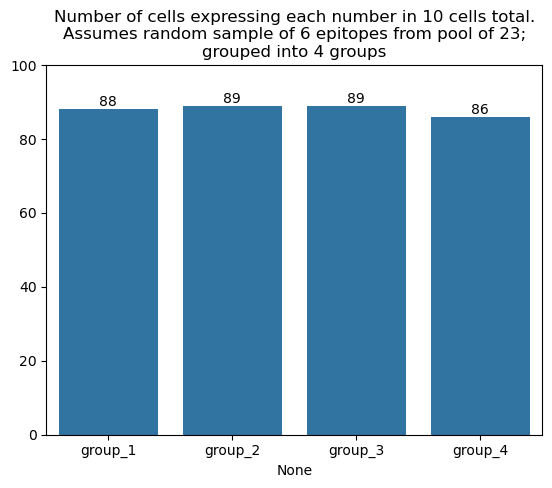

In [143]:



ax = sns.barplot(x = df[group_cols].sum().index, y = df[group_cols].sum().values)
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_ylim(0, num_cells)

ax.set_title("Number of cells expressing each number in 10 cells total.\nAssumes random sample of 6 epitopes from pool of 23;\ngrouped into 4 groups")

# for each group, plot the number of cells expressing each number.
for group in group_cols:
    ax.annotate(f"{df[group].sum()}", xy = (group, df[group].sum()), xytext = (group, df[group].sum()), ha = 'center', va = 'bottom')
